### Energy Information Administration API Example

Brian Dew

December 28, 2019

In [8]:
%matplotlib inline
import requests
import pandas as pd
from config import eia_key as key

In [46]:
s_ids = ['MCRFPCO2', 'MCRFPTX2', 'MCRFPND2', 'MCRFPNM2', 
         'MCRFPUS2', 'MCRFP3FM2']
sl = []

for s in s_ids:
    sl.append(f'&facets[series][]={s}')
    
idlist = ''.join(sl)


url = ('https://api.eia.gov/v2/petroleum/crd/crpdn/data/'+
       f'?api_key={key}'+       
       f'&frequency=monthly&data[0]=value{idlist}'+
       '&start=1989-01'+
       '&sort[0][column]=period&sort[0][direction]=desc'+
       '&offset=0&length=5000')

url2 = ('https://api.eia.gov/v2/petroleum/sum/snd/data/'+
       f'?api_key={key}'+
       f'&frequency=monthly&data[0]=value{idlist}'+
       '&start=1989-01'+
       '&sort[0][column]=period&sort[0][direction]=desc'+
       '&offset=0&length=5000')

r = requests.get(url).json()
r2 = requests.get(url2).json()

d = {}
for s in s_ids:
    m = {pd.to_datetime(f'{i["period"]}-01'): i['value'] 
      for i in r['response']['data'] if i['series'] == s}
    d[s] = m
    m2 = {pd.to_datetime(f'{i["period"]}-01'): i['value'] 
      for i in r2['response']['data'] if i['series'] == s}
    if len(m) == 0:
        d[s] = m2
        
df = pd.DataFrame(d).sort_index()

In [51]:
df['ND_NM_CO'] = df[['MCRFPND2', 'MCRFPNM2', 'MCRFPCO2']].sum(axis=1)

df['USA'] = df['MCRFPUS2']

df['TX'] = df['MCRFPTX2']

df['GM'] = df['MCRFP3FM2']

df['OTH'] = df['USA'] - df['TX'] - df['ND_NM_CO'] - df['GM']

data = df.loc['1989':,['ND_NM_CO', 'TX', 'OTH', 'GM', 'USA']].divide(1000, axis=1)
#data.to_csv('/home/brian/Documents/uschartbook/chartbook/data/oil_prod.csv', index_label='date')

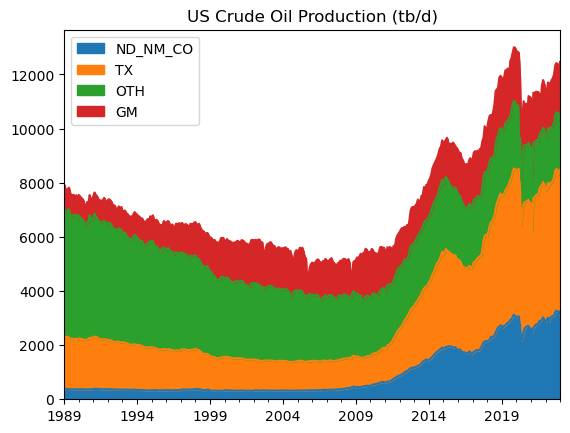

In [52]:
df[['ND_NM_CO', 'TX', 'OTH', 'GM']].plot(kind='area', title='US Crude Oil Production (tb/d)');